In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
# importing 
from pyspark.sql import SparkSession 
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType, DateType
from pyspark.sql.functions import col, sum as _sum,  count, when, lit, desc, row_number, month, to_date, trim, substring, corr
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#creating session
spark = SparkSession.builder.appName("Road Accident Data Analysis").getOrCreate()

In [0]:

# reading csv from amazon s3
Road_2009to11_df = spark.read.format("csv").option("header","true").load("s3://kiruthikadiaprojectsem1/accidents_2009_to_2011.csv")
     

In [0]:

# giving the schema proper datatype
schema1 = StructType([
    StructField("Accident_Index", StringType(), False),
    StructField("Location_Easting_OSGR", IntegerType(), False),
    StructField("Location_Northing_OSGR", IntegerType(), False),
    StructField("Longitude", FloatType(), False),
    StructField("Latitude", FloatType(), False),
    StructField("Police_Force", IntegerType(), False),
    StructField("Accident_Severity", IntegerType(), False),
    StructField("Number_of_Vehicles", IntegerType(), False),
    StructField("Number_of_Casualties", IntegerType(), False),
    StructField("Date", StringType(), False),
    StructField("Day_of_Week", IntegerType(), False),
    StructField("Time", StringType(), True),
    StructField("Local_Authority_(District)", IntegerType(), False),
    StructField("Local_Authority_(Highway)", StringType(), False),
    StructField("1st_Road_Class", IntegerType(), False),
    StructField("1st_Road_Number", IntegerType(), False),
    StructField("Road_Type", StringType(), False),
    StructField("Speed_limit", IntegerType(), False),
    StructField("Junction_Detail", FloatType(), True),
    StructField("Junction_Control", StringType(), True),
    StructField("2nd_Road_Class", IntegerType(), False),
    StructField("2nd_Road_Number", IntegerType(), False),
    StructField("Pedestrian_Crossing-Human_Control", StringType(), False),
    StructField("Pedestrian_Crossing-Physical_Facilities", StringType(), False),
    StructField("Light_Conditions", StringType(), False),
    StructField("Weather_Conditions", StringType(), True),
    StructField("Road_Surface_Conditions", StringType(), True),
    StructField("Special_Conditions_at_Site", StringType(), True),
    StructField("Carriageway_Hazards", StringType(), True),
    StructField("Urban_or_Rural_Area", IntegerType(), False),
    StructField("Did_Police_Officer_Attend_Scene_of_Accident", StringType(), True),
    StructField("LSOA_of_Accident_Location", StringType(), True),
    StructField("Year", IntegerType(), False)
])


In [0]:

# assinging the correct schema to the dataframe
Road_2009to11_df = spark.read.schema(schema1).format("csv").option("header","true").load("s3://kiruthikadiaprojectsem1/accidents_2009_to_2011.csv")
     

In [0]:
# reading the second dataset from amazon s3
Road_2012to14_df = spark.read.format("csv").option("header","true").load("s3://kiruthikadiaprojectsem1/accidents_2012_to_2014.csv")

In [0]:

# giving the schema proper datatype
schema2 = StructType([
    StructField("Accident_Index", StringType(), False),
    StructField("Location_Easting_OSGR", IntegerType(), False),
    StructField("Location_Northing_OSGR", IntegerType(), False),
    StructField("Longitude", FloatType(), False),
    StructField("Latitude", FloatType(), False),
    StructField("Police_Force", IntegerType(), False),
    StructField("Accident_Severity", IntegerType(), False),
    StructField("Number_of_Vehicles", IntegerType(), False),
    StructField("Number_of_Casualties", IntegerType(), False),
    StructField("Date", StringType(), False),
    StructField("Day_of_Week", IntegerType(), False),
    StructField("Time", StringType(), True),
    StructField("Local_Authority_(District)", IntegerType(), False),
    StructField("Local_Authority_(Highway)", StringType(), False),
    StructField("1st_Road_Class", IntegerType(), False),
    StructField("1st_Road_Number", IntegerType(), False),
    StructField("Road_Type", StringType(), False),
    StructField("Speed_limit", IntegerType(), False),
    StructField("Junction_Detail", FloatType(), True),
    StructField("Junction_Control", StringType(), True),
    StructField("2nd_Road_Class", IntegerType(), False),
    StructField("2nd_Road_Number", IntegerType(), False),
    StructField("Pedestrian_Crossing-Human_Control", StringType(), False),
    StructField("Pedestrian_Crossing-Physical_Facilities", StringType(), False),
    StructField("Light_Conditions", StringType(), False),
    StructField("Weather_Conditions", StringType(), True),
    StructField("Road_Surface_Conditions", StringType(), True),
    StructField("Special_Conditions_at_Site", StringType(), True),
    StructField("Carriageway_Hazards", StringType(), True),
    StructField("Urban_or_Rural_Area", IntegerType(), False),
    StructField("Did_Police_Officer_Attend_Scene_of_Accident", StringType(), True),
    StructField("LSOA_of_Accident_Location", StringType(), True),
    StructField("Year", IntegerType(), False)
])

In [0]:
# assinging the correct schema to the dataframe
Road_2012to14_df = spark.read.schema(schema2).format("csv").option("header","true").load("s3://kiruthikadiaprojectsem1/accidents_2012_to_2014.csv")

In [0]:
# displaying the first 5 datas from both the dataframe
Road_2009to11_df.show(5)
Road_2012to14_df.show(5)

+--------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+--------------------------+-------------------------+--------------+---------------+------------------+-----------+---------------+--------------------+--------------+---------------+---------------------------------+---------------------------------------+--------------------+--------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-------------------------+----+
|Accident_Index|Location_Easting_OSGR|Location_Northing_OSGR|Longitude| Latitude|Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|      Date|Day_of_Week| Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|         Road_Type|Speed_limit|Junction_Detail|    Junction_Control|2nd_Road_Class|2nd_R

In [0]:
# Checking the shape of the dataset
num_rows = Road_2009to11_df.count()
num_cols = len(Road_2009to11_df.columns)

# Printing the shape
print("Shape of the Dataset: ({}, {})".format(num_rows, num_cols))


Shape of the Dataset: (469442, 33)


In [0]:
# Checking the shape of the dataset
num_rows = Road_2012to14_df.count()
num_cols = len(Road_2012to14_df.columns)

# Printing the shape
print("Shape of the Dataset: ({}, {})".format(num_rows, num_cols))

Shape of the Dataset: (464697, 33)


In [0]:
# Combining datasets
combined_df = Road_2009to11_df.union(Road_2012to14_df)

# converting dataframe to RDD
combined_rdd = combined_df.rdd

# Checking the shape of the dataset
num_rows = combined_rdd.count()
num_cols = len(combined_rdd.first())

# Printing the shape
print("Shape of the Dataset: ({}, {})".format(num_rows, num_cols))


Shape of the Dataset: (934139, 33)


In [0]:
# Checking for null values
null_values = combined_df.select([_sum(col(c).isNull().cast("int")).alias(c) for c in combined_df.columns])
null_values.show()


+--------------+---------------------+----------------------+---------+--------+------------+-----------------+------------------+--------------------+----+-----------+----+--------------------------+-------------------------+--------------+---------------+---------+-----------+---------------+----------------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-------------------------+----+
|Accident_Index|Location_Easting_OSGR|Location_Northing_OSGR|Longitude|Latitude|Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|Date|Day_of_Week|Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|Road_Type|Speed_limit|Junction_Detail|Junction_Control|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_Control|Ped

In [0]:
# Unneccesary Columns to drop
columns_to_drop = ["Junction_Detail", "Junction_Control"]

# Droping the columns
combined_df = combined_df.drop(*columns_to_drop)

# Showing the DataFrame after dropping columns
print("DataFrame after dropping columns:")
combined_df.show()

# Checking for null values
null_values = combined_df.select([_sum(col(c).isNull().cast("int")).alias(c) for c in combined_df.columns])
null_values.show()

DataFrame after dropping columns:
+--------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+--------------------------+-------------------------+--------------+---------------+------------------+-----------+--------------+---------------+---------------------------------+---------------------------------------+--------------------+--------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-------------------------+----+
|Accident_Index|Location_Easting_OSGR|Location_Northing_OSGR|Longitude| Latitude|Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|      Date|Day_of_Week| Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|         Road_Type|Speed_limit|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_Con

In [0]:

columns = ["Weather_Conditions", "Road_Surface_Conditions", "Special_Conditions_at_Site", "Carriageway_Hazards", "Did_Police_Officer_Attend_Scene_of_Accident", "Time","LSOA_of_Accident_Location"]

# Function to get the mode
def get_mode(df, columns_to_impute):
    return df.groupBy(columns).count().orderBy(desc("count")).select(columns).first()[0]

# Imputing missing values with mode
for col_name in columns:
    mode_value = get_mode(combined_df, col_name)
    combined_df = combined_df.withColumn(col_name, when(col(col_name).isNull(), lit(mode_value)).otherwise(col(col_name)))

# Checking for remaining null values
null_values = combined_df.select([count(when(col(c).isNull(), c)).alias(c) for c in combined_df.columns])
null_values.show()
combined_df.show()


+--------------+---------------------+----------------------+---------+--------+------------+-----------------+------------------+--------------------+----+-----------+----+--------------------------+-------------------------+--------------+---------------+---------+-----------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-------------------------+----+
|Accident_Index|Location_Easting_OSGR|Location_Northing_OSGR|Longitude|Latitude|Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|Date|Day_of_Week|Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|Road_Type|Speed_limit|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_Control|Pedestrian_Crossing-Physical_Facilities|Light_Conditions|Weather_Cond

In [0]:
combined_df = combined_df.withColumn("Date", to_date(combined_df["Date"], "MM/dd/yyyy")) 
# Create a new column "Month" by extracting the month from the "Date Rptd" column
combined_df = combined_df.withColumn("Month", month(combined_df["Date"]))
combined_df.show(2)

+--------------+---------------------+----------------------+---------+--------+------------+-----------------+------------------+--------------------+----------+-----------+-----+--------------------------+-------------------------+--------------+---------------+------------------+-----------+--------------+---------------+---------------------------------+---------------------------------------+--------------------+--------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-------------------------+----+-----+
|Accident_Index|Location_Easting_OSGR|Location_Northing_OSGR|Longitude|Latitude|Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|      Date|Day_of_Week| Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|         Road_Type|Speed_limit|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_Control|Pedestrian_Crossing-Physi

In [0]:
# Group by 'Accident_Severity' and calculating the sum of 'Number_of_Casualties' for each group
grouped_data = combined_df.groupBy('Accident_Severity').agg(_sum('Number_of_Casualties').alias('Total_Casualties'))

grouped_data.show()

+-----------------+----------------+
|Accident_Severity|Total_Casualties|
+-----------------+----------------+
|                1|           19856|
|                3|         1049988|
|                2|          185001|
+-----------------+----------------+



In [0]:
# Group by 'Light_Conditions' and calculating the sum of 'Number_of_Casualties' for each group
grouped_by_light_condition = combined_df.groupBy('Light_Conditions').agg(_sum('Number_of_Casualties').alias('Total_Casualties'))

grouped_by_light_condition.show()

+--------------------+----------------+
|    Light_Conditions|Total_Casualties|
+--------------------+----------------+
|Daylight: Street ...|          916613|
|Darkeness: No str...|           73487|
|Darkness: Street ...|          243757|
|Darkness: Street ...|            5974|
|Darkness: Street ...|           15014|
+--------------------+----------------+



In [0]:
# Group by 'Weather_Conditions' and calculating the sum of 'Number_of_Casualties' for each group
grouped_by_Weather_Conditions = combined_df.groupBy('Weather_Conditions').agg(_sum('Number_of_Casualties').alias('Total_Casualties'))

grouped_by_Weather_Conditions.show()

+--------------------+----------------+
|  Weather_Conditions|Total_Casualties|
+--------------------+----------------+
|Raining without h...|          150576|
|Snowing with high...|            2012|
|Snowing without h...|           11219|
|             Unknown|           20900|
|               Other|           27072|
|Fine with high winds|           14779|
|Fine without high...|         1003748|
|Raining with high...|           17604|
|         Fog or mist|            6935|
+--------------------+----------------+



In [0]:

# Group by 'Year' and calculating the sum of 'Number_of_Casualties' for each month
monthly_casualties = combined_df.groupBy('Year').agg(_sum('Number_of_Casualties').alias('Total_Casualties'))

# Display the result
monthly_casualties.show()


+----+----------------+
|Year|Total_Casualties|
+----+----------------+
|2009|          222146|
|2010|          208648|
|2011|          203950|
|2012|          241954|
|2013|          183670|
|2014|          194477|
+----+----------------+



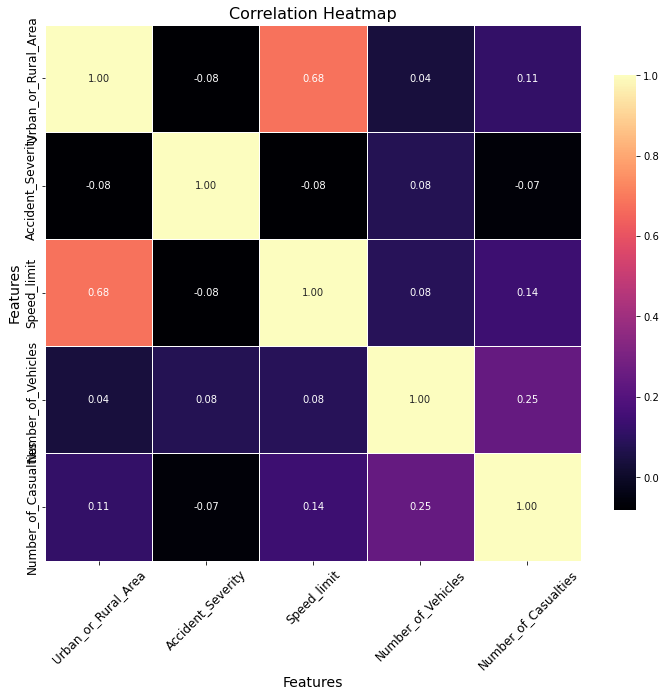

In [0]:
# visualizing all the variables using heatmap

col_names = ['Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Urban_or_Rural_Area','Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities','Accident_Severity','Speed_limit','Number_of_Vehicles','Number_of_Casualties']
# Compute the correlation matrix
correlation_matrix = combined_df.select(*col_names).toPandas().corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,  # Display correlation values
            cmap="magma",  # Color palette
            fmt=".2f",  # Format for annotations
            linewidths=1,  # Width of lines separating cells
            linecolor='white',  # Color of lines separating cells
            cbar_kws={"shrink": 0.8},  # Size of color bar
            square=True)  # Ensure square cells
plt.title("Correlation Heatmap", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()



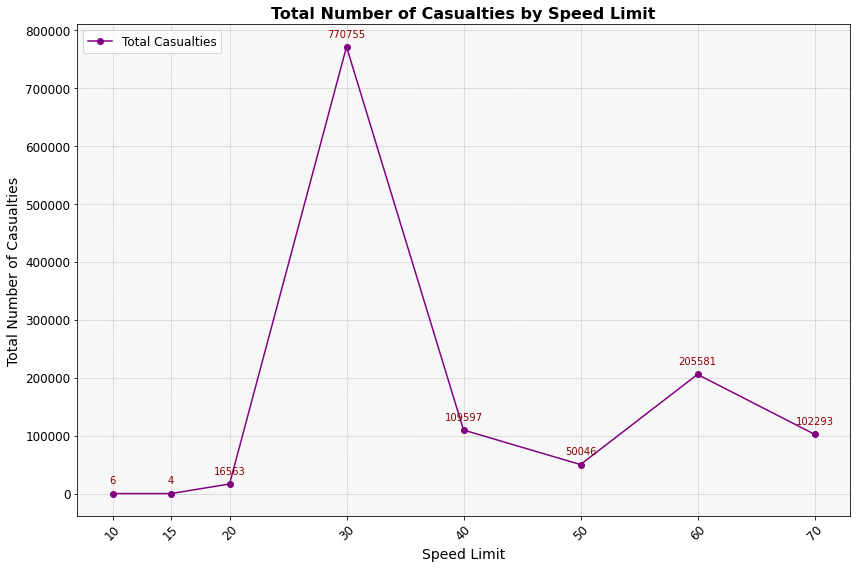

In [0]:
# creating line plot to visualize the Total number of Casualties by speed limit
# Group by 'Speed_limit' and calculating the sum of 'Number_of_Casualties' for each speed limit
grouped_data = combined_df.groupBy('Speed_limit').agg(_sum('Number_of_Casualties').alias('Total_Casualties'))

# Converting PySpark DataFrame to Pandas DataFrame for visualization
grouped_data_pd = grouped_data.toPandas()
grouped_data_pd = grouped_data_pd.dropna(subset=['Speed_limit'])
grouped_data_pd = grouped_data_pd.sort_values(by='Speed_limit')
plt.figure(figsize=(12, 8)) 
plt.plot(grouped_data_pd['Speed_limit'], grouped_data_pd['Total_Casualties'], marker='o', linestyle='-', color='purple')
plt.xlabel('Speed Limit', fontsize=14)
plt.ylabel('Total Number of Casualties', fontsize=14)
plt.title('Total Number of Casualties by Speed Limit', fontsize=16, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(grouped_data_pd['Speed_limit'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for i, txt in enumerate(grouped_data_pd['Total_Casualties']):
    plt.annotate(txt, (grouped_data_pd['Speed_limit'].iloc[i], grouped_data_pd['Total_Casualties'].iloc[i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='darkred')

plt.gca().set_facecolor('#f7f7f7')
plt.legend(['Total Casualties'], loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


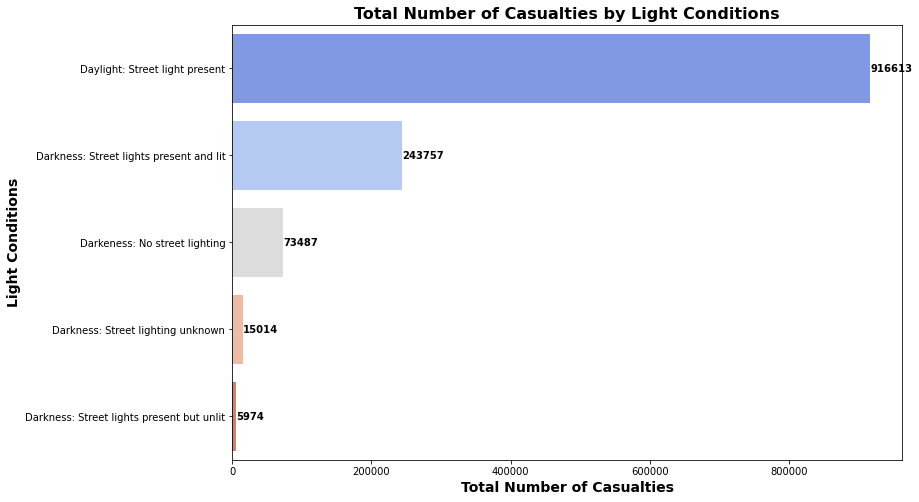

In [0]:
# creating line plot to visualize the Total number of Casualties by Light conditions
# Group by 'Light_Conditions' and calculating the sum of 'Number_of_Casualties' for each group
grouped_data = combined_df.groupBy('Light_Conditions').agg(_sum('Number_of_Casualties').alias('Total_Casualties'))

# Convert PySpark DataFrame to Pandas DataFrame for visualization
grouped_data_pd = grouped_data.toPandas()
grouped_data_pd = grouped_data_pd.sort_values(by='Total_Casualties', ascending=False)
palette = sns.color_palette('coolwarm', len(grouped_data_pd))
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data_pd, y='Light_Conditions', x='Total_Casualties', palette=palette)
plt.xlabel('Total Number of Casualties', fontsize=14, fontweight='bold')
plt.ylabel('Light Conditions', fontsize=14, fontweight='bold')
plt.title('Total Number of Casualties by Light Conditions', fontsize=16, fontweight='bold')

for index, value in enumerate(grouped_data_pd['Total_Casualties']):
    plt.text(value, index, f'{value}', color='black', ha="left", va="center", fontweight='bold')
plt.show()

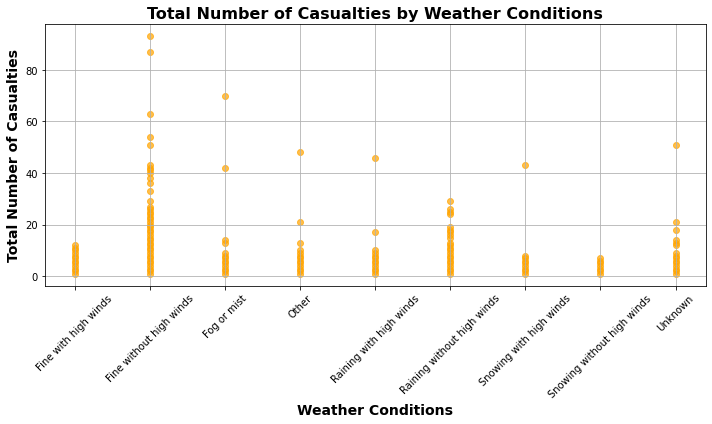

In [0]:
# creating line plot to visualize the Total number of Casualties by weather conditions
# # Group by 'Weather_Conditions' and 'Severity' and calculating the sum of 'Count' for each group
grouped_data = combined_df.groupBy('Weather_Conditions', 'Number_of_Casualties').sum('Number_of_Casualties').orderBy('Weather_Conditions')

# Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = grouped_data.toPandas()
plt.figure(figsize=(10, 6)) 
plt.scatter(pandas_df['Weather_Conditions'], pandas_df['Number_of_Casualties'], color='orange', alpha=0.7)
plt.xlabel('Weather Conditions', fontsize=14, fontweight='bold')
plt.ylabel('Total Number of Casualties', fontsize=14, fontweight='bold')
plt.title('Total Number of Casualties by Weather Conditions', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



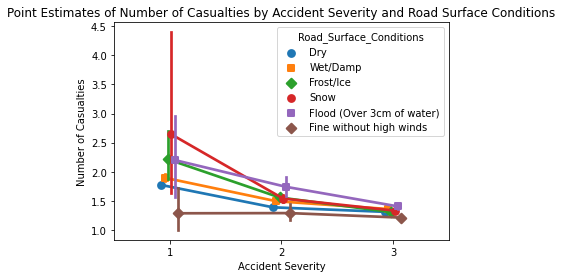

In [0]:
# creating line plot to visualize the Total number of Casualties by Road surface conditions
# Getting unique categories in 'Road_Surface_Conditions' column
unique_conditions = combined_df.select('Road_Surface_Conditions').distinct().rdd.map(lambda row: row[0]).collect()
markers = ['o', 's', 'D'] * (len(unique_conditions) // 3 + 1)

# Plotting the point plot
sns.pointplot(data=combined_df.toPandas(), x='Accident_Severity', y='Number_of_Casualties', hue='Road_Surface_Conditions', dodge=True, markers=markers)
plt.xlabel('Accident Severity')
plt.ylabel('Number of Casualties')
plt.title('Point Estimates of Number of Casualties by Accident Severity and Road Surface Conditions')
plt.show()


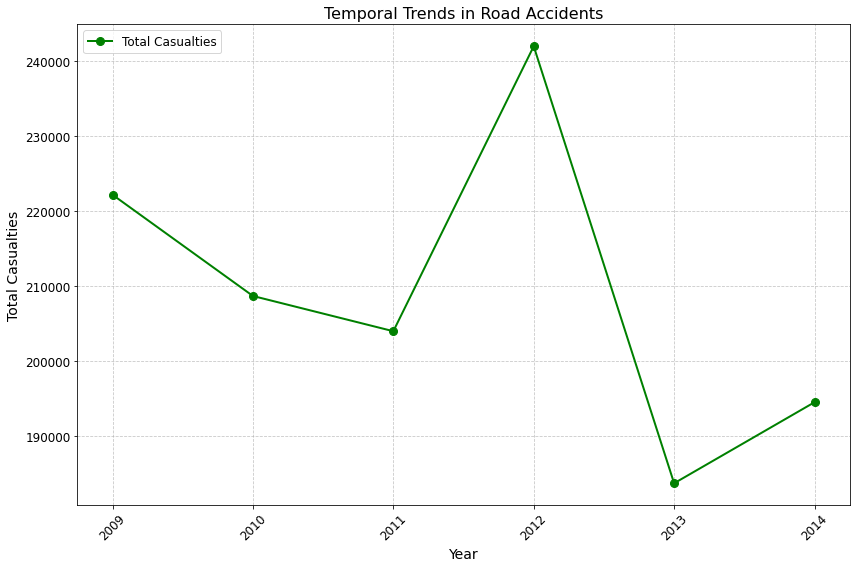

In [0]:
# creating the plot for Year and Total Casualities 
# Step 1: Extract necessary data from the RDD
# Extract year and number of casualties
extracted_rdd = combined_rdd.map(lambda row: (row['Year'], row['Number_of_Casualties']))

# Aggregate the total number of casualties per year
yearly_casualties_rdd = extracted_rdd.reduceByKey(lambda a, b: a + b)

# Convert the RDD to a Spark DataFrame
yearly_casualties_df = yearly_casualties_rdd.toDF(["Year", "Total_Casualties"])

# Step 2: Convert to Pandas DataFrame
yearly_casualties_pd = yearly_casualties_df.toPandas()

# Step 3: Create the Line Plot
plt.figure(figsize=(12, 8))
plt.plot(yearly_casualties_pd['Year'], yearly_casualties_pd['Total_Casualties'], marker='o', linestyle='-', color='green', linewidth=2, markersize=8, label='Total Casualties')
plt.title('Temporal Trends in Road Accidents', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Casualties', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




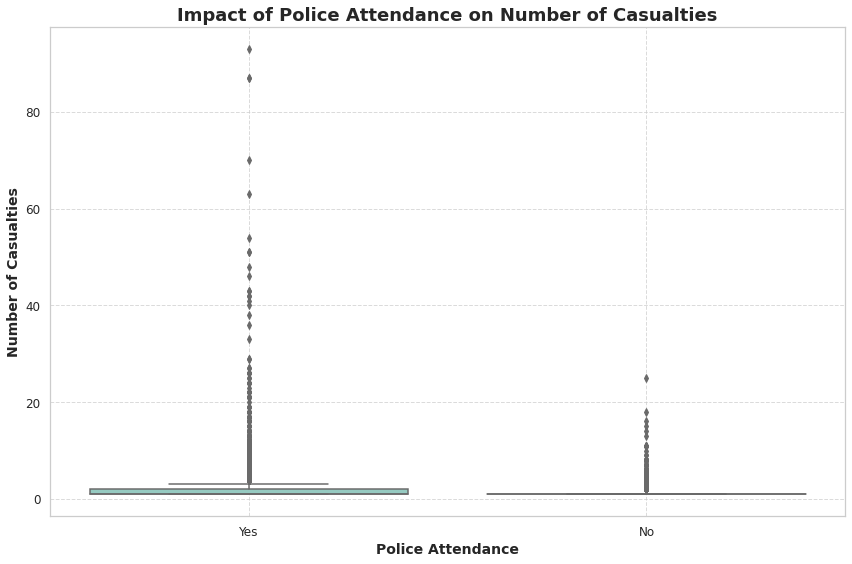

In [0]:
# # creating box plot to vizualize the impact of police attendance on total casualities
# Step 1: Extract necessary data from the RDD
extracted_rdd = combined_rdd.map(lambda row: (row['Did_Police_Officer_Attend_Scene_of_Accident'], row['Number_of_Casualties']))

# Step 2: Convert the RDD to a Pandas DataFrame
extracted_df = extracted_rdd.toDF(["Did_Police_Officer_Attend_Scene_of_Accident", "Number_of_Casualties"])
df_pd = extracted_df.toPandas()

# Step 3: Create the Box Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Did_Police_Officer_Attend_Scene_of_Accident', y='Number_of_Casualties', data=df_pd, palette="Set3")
plt.title('Impact of Police Attendance on Number of Casualties', fontsize=18, fontweight='bold')
plt.xlabel('Police Attendance', fontsize=14, fontweight='bold')
plt.ylabel('Number of Casualties', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

# Selecting features and label columns
selected_cols = ['Number_of_Vehicles', 'Number_of_Casualties', 'Road_Type', 'Speed_limit',
                  'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Accident_Severity']
df = combined_df.select(selected_cols)

# Droping rows with missing values
df = df.dropna()

# Converting string columns to numerical using StringIndexer
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in ['Road_Type', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions']]
pipeline = Pipeline(stages=indexers)
df = pipeline.fit(df).transform(df)

# Vectorize features
assembler = VectorAssembler(inputCols=['Number_of_Vehicles', 'Number_of_Casualties', 'Road_Type_index', 'Speed_limit', 'Light_Conditions_index', 'Weather_Conditions_index', 'Road_Surface_Conditions_index'], outputCol="features")
df = assembler.transform(df)

# Splitting the data into training and testing sets
train_data, test_data = df.randomSplit([0.7, 0.3], seed=42)

# Random Forest Classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="Accident_Severity", numTrees=100, seed=42)

# Fitting the model
model = rf.fit(train_data)
predictions = model.transform(test_data)

# Evaluating the model
evaluator = MulticlassClassificationEvaluator(labelCol="Accident_Severity", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Accuracy = {:.2f}%".format(accuracy * 100))





Test Accuracy = 84.99%
